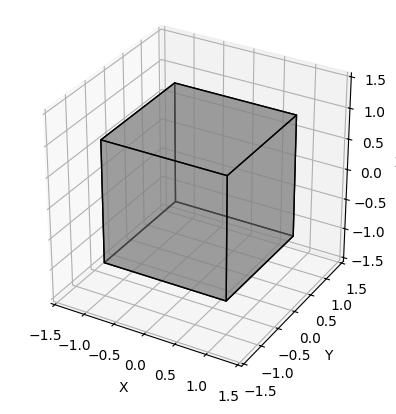

In [5]:
#Below is working code to plot a gray cube in 3D


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from transforms3d.quaternions import quat2mat


# Define vertices of a cube
vertices = np.array([[1, 1, 1],
                     [1, 1, -1],
                     [1, -1, -1],
                     [1, -1, 1],
                     [-1, 1, 1],
                     [-1, 1, -1],
                     [-1, -1, -1],
                     [-1, -1, 1]])

# Define edges of the cube
edges = [[0, 1], [1, 2], [2, 3], [3, 0],
         [4, 5], [5, 6], [6, 7], [7, 4],
         [0, 4], [1, 5], [2, 6], [3, 7]]

# Define faces of the cube
faces = [[vertices[j] for j in [0, 1, 2, 3]],
         [vertices[j] for j in [4, 5, 6, 7]],
         [vertices[j] for j in [0, 1, 5, 4]],
         [vertices[j] for j in [2, 3, 7, 6]],
         [vertices[j] for j in [0, 3, 7, 4]],
         [vertices[j] for j in [1, 2, 6, 5]]]

# Plot the cube
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

'''
for edge in edges:
    ax.plot3D(*zip(*vertices[edge]), color='gray')
'''

# Plot each face of the cube as a polygon
cube_faces = Poly3DCollection(faces, alpha=0.5, linewidths=1, edgecolors='k', facecolors='gray')
ax.add_collection3d(cube_faces)

# Set the limits of the axes
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])

# Set the aspect ratio of the plot to be equal
ax.set_box_aspect([1,1,1])

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()



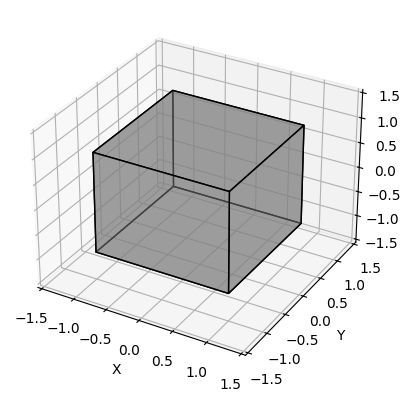

In [15]:
#Adding to our work in the above cell, we are going
#to set the cubes orientation with a quaternion

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from transforms3d.quaternions import quat2mat, qmult, qinverse

# Define vertices of a cube centered at the origin
vertices = np.array([[1, 1, 1],
                     [1, 1, -1],
                     [1, -1, -1],
                     [1, -1, 1],
                     [-1, 1, 1],
                     [-1, 1, -1],
                     [-1, -1, -1],
                     [-1, -1, 1]])

# Define edges of the cube
edges = [[0, 1], [1, 2], [2, 3], [3, 0],
         [4, 5], [5, 6], [6, 7], [7, 4],
         [0, 4], [1, 5], [2, 6], [3, 7]]

# Define faces of the cube
faces = [[vertices[j] for j in [0, 1, 2, 3]],
         [vertices[j] for j in [4, 5, 6, 7]],
         [vertices[j] for j in [0, 1, 5, 4]],
         [vertices[j] for j in [2, 3, 7, 6]],
         [vertices[j] for j in [0, 3, 7, 4]],
         [vertices[j] for j in [1, 2, 6, 5]]]



# Function to rotate the cube vertices based on a quaternion orientation
def rotate_cube(quaternion):
    # Conjugate of the quaternion for the operation
    q_conjugate = quaternion.copy()
    q_conjugate[0] *= -1
    
    # Rotate each vertex individually and reconnect them
    rotated_vertices = np.array([qmult(quaternion, qmult([0] + vertex.tolist(), q_conjugate))[1:] for vertex in vertices])
    
    return rotated_vertices



# Function to plot the rotated cube
def plot_rotated_cube(rotated_vertices):
    # Plot the cube
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot each face of the cube as a polygon
    cube_faces = Poly3DCollection(faces, alpha=0.5, linewidths=1, edgecolors='k', facecolors='gray')
    ax.add_collection3d(cube_faces)

    # Set the limits of the axes
    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.set_zlim([-1.5, 1.5])

    # Set labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()

# Example quaternion orientation
quaternion = np.array([1, 0, 0, 0])  # No rotation (identity quaternion)

# Rotate the cube vertices based on the quaternion orientation
rotated_vertices = rotate_cube(quaternion)

# Plot the rotated cube
plot_rotated_cube(rotated_vertices)

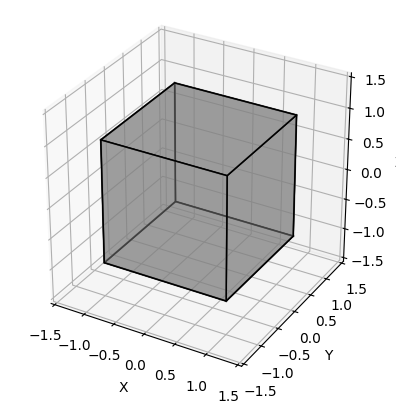

In [6]:
#Trying to bond the cube to a vector


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from transforms3d.quaternions import quat2mat


# Define vertices of a cube -- points in 3 space
vertices = np.array([[1, 1, 1],
                     [1, 1, -1],
                     [1, -1, -1],
                     [1, -1, 1],
                     [-1, 1, 1],
                     [-1, 1, -1],
                     [-1, -1, -1],
                     [-1, -1, 1]])

#I could bind these vertices to a vector in 3space -- I could do that by defining these points based on some arithmetic operation


# Didn't need to define edges apparently

# Define faces of the cube
faces = [[vertices[j] for j in [0, 1, 2, 3]],
         [vertices[j] for j in [4, 5, 6, 7]],
         [vertices[j] for j in [0, 1, 5, 4]],
         [vertices[j] for j in [2, 3, 7, 6]],
         [vertices[j] for j in [0, 3, 7, 4]],
         [vertices[j] for j in [1, 2, 6, 5]]]

# Plot the cube
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


for edge in edges:
    ax.plot3D(*zip(*vertices[edge]), color='gray')


# Plot each face of the cube as a polygon
cube_faces = Poly3DCollection(faces, alpha=0.5, linewidths=1, edgecolors='k', facecolors='gray')
ax.add_collection3d(cube_faces)

# Set the limits of the axes
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])

# Set the aspect ratio of the plot to be equal
ax.set_box_aspect([1,1,1])

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [3]:
#this cell is another possible way to draw a cube

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from itertools import product, combinations


fig = plt.figure()
ax = fig.gca(projection='3d') 
ax.set_aspect("equal")

# draw cube
r = [-1, 1]
for s, e in combinations(np.array(list(product(r, r, r))), 2):
    if np.sum(np.abs(s-e)) == r[1]-r[0]:
        ax.plot3D(*zip(s, e), color="b")

TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

<Figure size 640x480 with 0 Axes>

In [11]:
#this cell is trying to generate a random quaternion trajectory

import numpy as np
import csv

# Function to generate random unit quaternion
def random_unit_quaternion():
    vec = np.random.rand(3)
    vec /= np.linalg.norm(vec)
    angle = np.random.rand() * 2 * np.pi
    scalar = np.cos(angle / 2)
    vec *= np.sin(angle / 2)
    return np.array([scalar] + vec.tolist())

# Generate sample quaternion trajectory
num_samples = 100
trajectory = [random_unit_quaternion() for _ in range(num_samples)]

# Save trajectory to CSV file
with open('quaternion_trajectory.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['w', 'x', 'y', 'z'])  # Writing header
    writer.writerows(trajectory)

In [ ]:
#resource here: https://automaticaddison.com/how-to-convert-a-quaternion-into-euler-angles-in-python/
#says that euler angles are easier to work with vectors in python

import math
 
def euler_from_quaternion(x, y, z, w):
        """
        Convert a quaternion into euler angles (roll, pitch, yaw)
        roll is rotation around x in radians (counterclockwise)
        pitch is rotation around y in radians (counterclockwise)
        yaw is rotation around z in radians (counterclockwise)
        """
        t0 = +2.0 * (w * x + y * z)
        t1 = +1.0 - 2.0 * (x * x + y * y)
        roll_x = math.atan2(t0, t1)
     
        t2 = +2.0 * (w * y - z * x)
        t2 = +1.0 if t2 > +1.0 else t2
        t2 = -1.0 if t2 < -1.0 else t2
        pitch_y = math.asin(t2)
     
        t3 = +2.0 * (w * z + x * y)
        t4 = +1.0 - 2.0 * (y * y + z * z)
        yaw_z = math.atan2(t3, t4)
     
        return roll_x, pitch_y, yaw_z # in radians


MovieWriter ffmpeg unavailable; using Pillow instead.


data is [array([[0.90687198, 0.91672163, 0.90838346, 0.94317783, 0.93238727,
        0.9177669 , 0.871074  , 0.87316749, 0.91517046, 0.88063514,
        0.92442066, 0.88620006, 0.9318563 , 0.97703286, 1.0255554 ,
        1.07457343, 1.10582375, 1.07104111, 1.0302601 , 1.06088971,
        1.0804487 , 1.05986594, 1.02934755, 1.06756621, 1.03783846],
       [0.78837333, 0.78258789, 0.75526893, 0.79893452, 0.81976699,
        0.81019414, 0.81399508, 0.77424356, 0.80266653, 0.82478586,
        0.83245724, 0.87751726, 0.91845981, 0.88009195, 0.90512549,
        0.8612232 , 0.86949687, 0.87220282, 0.87339857, 0.84761843,
        0.83375112, 0.84975958, 0.88595014, 0.88868606, 0.84624181],
       [0.76840584, 0.79070964, 0.78613238, 0.831736  , 0.79468758,
        0.80954097, 0.77271228, 0.73851032, 0.72821507, 0.76189816,
        0.73140082, 0.70976805, 0.69261057, 0.73004198, 0.77855763,
        0.72893123, 0.69395583, 0.69189635, 0.64617946, 0.68100057,
        0.68157071, 0.68498424, 0.732

'\n#cube_ani.save("slew_noRW.gif")\nfig = plt.figure()\n#ax = fig.axes()\nplt.plot(thetaset_1rw*180/np.pi, color=\'red\')\nplt.plot(thetaset_norw*180/np.pi, color=\'blue\')\nplt.plot(thetaset_3rw*180/np.pi, color=\'green\')\nplt.xlabel("Time [sec]")\nplt.ylabel("Allowable Angular Deviation [degrees]")\nfig = plt.figure()\nax = fig.add_subplot(111, projection=\'3d\')\ntheta = np.linspace(-2*np.pi,2*np.pi, 98)\nR = 2*thetaset_3rw*180/np.pi\nX = np.linspace(0,98,98)\nX,theta = np.meshgrid(X, theta)\nY = (R*np.sin(theta))\nZ = (R*np.cos(theta))\nsurf = ax.plot_surface(X,Y,Z,linewidth = 0,color = \'green\', alpha = 0.1, zorder=1, label="3 reaction wheels")\nsurf._edgecolors2d = surf._edgecolor3d\nsurf._facecolors2d = surf._facecolor3d\nR = 2*thetaset_1rw*180/np.pi\n#X = np.linspace(0,98,98)\n#X,theta = np.meshgrid(X, theta)\nY = (R*np.sin(theta))\nZ = (R*np.cos(theta))\nsurf = ax.plot_surface(X,Y,Z,linewidth = 0,color = \'red\', alpha = 0.2, zorder=2, label="1 reaction wheel")\nsurf._edgeco

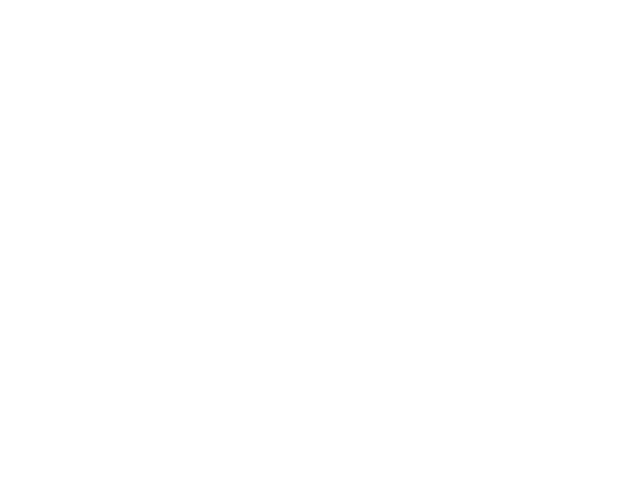

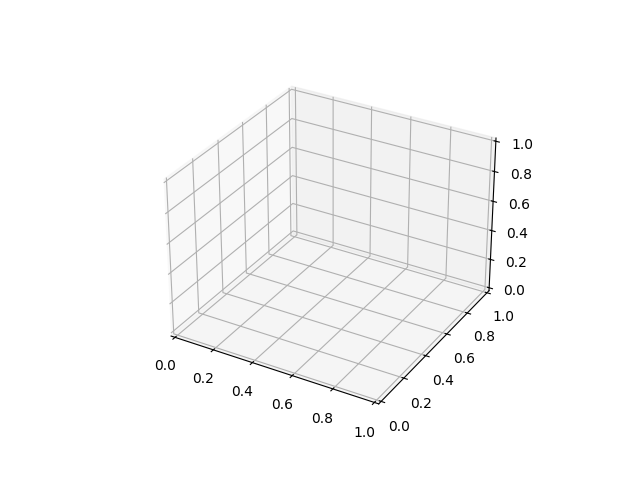

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
from itertools import product, combinations
from numpy import sin, cos
import ffmpeg

%matplotlib widget
#%matplotlib ipympl

def rot_mat(q):
    """
    This function finds the rotation matrix for a particular quaternion. Our quaternion formulation uses the Hamilton convention, and represents a
    rotation from the body frame to ECI frame (local-to-inertial rotation). So, the rotation matrix will rotate a body vector to ECI, and its transpose
    will rotate from ECI -> body.
    This means that if you want to rotate B_ECI to body frame, you MUST transpose the output of this function.
    Inputs:
        # q -- 4 x 1 numpy array, quaternion to find rot matrix of
    Returns:
        A -- 3 x 3 np matrix to rotate a vector between frames (should rotate body -> ECI based on our quaternion model)
    Duplicated from sim_helpers--estimator and components on board satellite must stand on their own.
    """
    q = q.reshape((4,1))
    q1 = q[0,0]
    q2 = q[1,0]
    q3 = q[2,0]
    q4 = q[3,0]
    A = np.matrix([[q1**2+q2**2-q3**2-q4**2, 2*(q2*q3-q1*q4), 2*(q2*q4+q1*q3)],
                    [2*(q2*q3+q1*q4), q1**2-q2**2+q3**2-q4**2, 2*(q3*q4-q1*q2)],
                    [2*(q2*q4-q1*q3), 2*(q3*q4+q1*q2), q1**2-q2**2-q3**2+q4**2]])

    return A

# Fixing random state for reproducibility
#np.random.seed(19680801)
Xset = np.genfromtxt(f'quaternion_trajectory.csv', delimiter=',')

'''
norw_filepath = 'ilqr_trajectories/2022-04-29/good_no_rw/'
_1rw_filepath = 'ilqr_trajectories/2022-04-29/good_1_rw/'
_3rw_filepath = 'ilqr_trajectories/2022-04-29/good_3_rw/'
norw_wset = np.genfromtxt(f'{norw_filepath}Xset.csv', delimiter=',')
_1rw_wset = np.genfromtxt(f'{_1rw_filepath}Xset.csv', delimiter=',')
_3rw_wset = np.genfromtxt(f'{_3rw_filepath}Xset.csv', delimiter=',')
filepath = 'ilqr_trajectories/2022-04-29/good_3_rw/'
Xset = np.genfromtxt(f'{filepath}Xset.csv', delimiter=',')
pg_vec = np.genfromtxt(f'{filepath}point_goal.csv', delimiter=',')
thetaset_1rw = np.genfromtxt(f'1_rw_LQR_Q1e-6_thetaset.csv', delimiter=',')
thetaset_norw = np.genfromtxt(f'no_rw_LQR_Q1e-6_thetaset.csv', delimiter=',')
thetaset_3rw = np.genfromtxt(f'3_rw_LQR_Q1e-6_thetaset.csv', delimiter=',')
'''

#Gen_RandLine generates a dims-dimensional random trajectory
def Gen_RandLine(length, dims=2):
    lineData = np.empty((dims, length))
    lineData[:, 0] = np.random.rand(dims)
    for index in range(1, length):
        # scaling the random numbers by 0.1 so
        # movement is small compared to position.
        # subtraction by 0.5 is to change the range to [-0.5, 0.5]
        # to allow a line to move backwards.
        step = ((np.random.rand(dims) - 0.5) * 0.1)
        lineData[:, index] = lineData[:, index - 1] + step

    return lineData


def update_lines(num, dataLines, lines):
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
        empty_data = np.zeros((data[0:3, :num].shape))
        if num > 0:
            empty_data[0, 0] = 0
            empty_data[1, 0] = 0
            empty_data[2, 0] = 0
        for i in range(1,num):
            empty_data[0:3, i] = data[0:3, num]
        line.set_data((empty_data[0:2, :num]))
        #print(data[2, num])
       # print(data[2, :num])
        line.set_3d_properties(0)#data[2, :num])
    #for line in lines:
        #line.set_data([0,0])
        #line.set_3d_properties([1])
    return lines

# Attaching 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)

#  3-D lines of length 25
data = [Gen_RandLine(25, 3)]# for index in range(25)]
print(f"data is {data}")
# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]

# Setting the axes properties
ax.set_xlim3d([0.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 1.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines, 25, fargs=(data, lines),
                                   interval=50, blit=False)

line_ani.save("test.gif")



# Create axis
axes = [1, 1, 1]

# Create Data
data = np.ones(axes, dtype=bool)

# Control Tranperency
alpha = 0.9

# Control colour
colors = np.empty(axes + [4], dtype=np.float32)

colors[:] = [1, 0, 0, alpha]  # red

# Plot figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Voxels is used to customizations of the
# sizes, positions and colors.
#ax.voxels(data, facecolors=colors)

def rotate_vector(s, q): #presumably rotates s by q in a qsq^-1 fashion
    s = [s[0], s[1], s[2]*3]
    s_rot_np = rot_mat(q)@(np.array(s).reshape(3,1))
    s_rotated = [s_rot_np[0].item(), s_rot_np[1].item(), s_rot_np[2].item()]
    return s_rotated

def plot_surface(vecs, q, ord): 
    vecs_rot = [rotate_vector(vec, q) for vec in vecs]
    x = np.array([[vecs_rot[0][0], vecs_rot[1][0]], [vecs_rot[2][0], vecs_rot[3][0]]])
    y = np.array([[vecs_rot[0][1], vecs_rot[1][1]], [vecs_rot[2][1], vecs_rot[3][1]]])
    z = np.array([[vecs_rot[0][2], vecs_rot[1][2]], [vecs_rot[2][2], vecs_rot[3][2]]])
    ax.plot_surface(x, y, z, color='blue', zorder=ord)


def update_box(num):
    num = min(num, 97)
    ax.clear()
    # Setting the axes properties
    ax.set_xlim3d([-10.0, 10.0])
    ax.set_xlabel('X')

    ax.set_ylim3d([-10.0, 10.0])
    ax.set_ylabel('Y')

    ax.set_zlim3d([-10.0, 10.0])
    ax.set_zlabel('Z')
    #ax.set_title(f'Radius of RoC = {(thetaset_3rw[num]*2*180/np.pi):3.2f} degrees ')
    theta = (num%10)*np.pi/10
    q = Xset[num, 3:7] #change depending on what Xset holds
    #print(q)
    camera_base = rotate_vector([2, 0, 0], q)
    camera_vec = rotate_vector([5, 0, 0], q)
    ax.quiver(camera_base[0], camera_base[1], camera_base[2], camera_vec[0], camera_vec[1], camera_vec[2], length=1, color='red', label="Camera vector")

    #goal_vec = pg_vec[num, :]
    #pg_base = np.array(goal_vec)*2
    #pg_end = np.array(goal_vec)*5
    #ax.quiver(pg_base[0], pg_base[1], pg_base[2], pg_end[0], pg_end[1], pg_end[2], length=3, color='green', linestyle='dashed', label="Target pointing vector")
    #ax.quiver(camera_base[0], camera_base[1], camera_base[2], camera_vec[0], camera_vec[1], camera_vec[2], length=1,color='red')

    # Set up the grid in polar
    x_len = 10
    angle = 2*thetaset_3rw[num] #tan(angle) = rmax/xlen
    rmax = x_len*np.tan(angle)
    theta = np.linspace(0,2*np.pi,90)
    r = np.linspace(0,rmax,90)
    T, R = np.meshgrid(theta, r)

    # Then calculate X, Y, and Z
    Y = R * np.cos(T)
    Z = R * np.sin(T)
    X = (x_len*1.0/rmax)*np.sqrt(Z**2 + Y**2)#+ 5# - 1
    sz = 8100
    rot_test = np.einsum('ij,jkl', rot_mat(q), np.array([list(X), list(Y), list(Z)]))#rot_mat(q)@np.array([list(X), list(Y), list(Z)])
    surf = ax.plot_surface(rot_test[0, :, :], rot_test[1, :, :], rot_test[2, :, :], color='green', label="RoC cone")
    surf._edgecolors2d = surf._edgecolor3d
    surf._facecolors2d = surf._facecolor3d
    #pts = np.array([list(X.reshape(sz, )), list(Y.reshape(sz, )), list(Z.reshape(sz, ))])
    #rot_pts =rot_mat(q)@pts
    #print(rot_pts[0, :].shape)
    #ax.plot_surface(rot_pts[0, :].reshape(90,90), rot_pts[1, :].reshape(90,90), rot_pts[2, :].reshape(90,90))

    #camera_base = rotate_vector([0, 0, 2], q)
    #camera_vec = rotate_vector([0, 0, 7.0/3.0], q)
    #ax.quiver(camera_base[0], camera_base[1], camera_base[2], camera_vec[0], camera_vec[1], camera_vec[2], length=1, color='red')

    s_left = [[-2, -2, -2], [-2, -2, 2], [-2, 2, -2], [-2, 2, 2]]
    plot_surface(s_left, q, 2)
    s_right = [[2, -2, -2], [2, -2, 2], [2, 2, -2], [2, 2, 2]]
    plot_surface(s_right, q, 3)
    s_top = [[-2, -2, 2], [-2, 2, 2], [2, -2, 2], [2, 2, 2]]
    plot_surface(s_top, q, 4)
    s_bottom = [[-2, -2, -2], [-2, 2, -2], [2, -2, -2], [2, 2, -2]]
    plot_surface(s_bottom, q, 5)
    s_front = [[-2, 2, -2], [-2, 2, 2], [2, 2, -2], [2, 2, 2]]
    plot_surface(s_front, q, 6)
    s_back = [[-2, -2, -2], [-2, -2, 2], [2, -2, -2], [2, -2, 2]]
    plot_surface(s_back, q, 7)
    ax.legend()


# Setting the axes properties
ax.set_xlim3d([0.0, 10.0])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, 10.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 10.0])
ax.set_zlabel('Z')


cube_ani = animation.FuncAnimation(fig, update_box, 108, interval=90, blit=False,repeat_delay=1000 )





'''
cube_ani.save("slew_3RW_convcone.gif")
def get_angle_to_z_axis(wset):
    thetas = np.zeros(wset.shape[0])
    for i in range(wset.shape[0]):
        dot_product = wset[i, 2]/(wset[i,0]**2+wset[i, 1]**2+wset[i,2]**2)**0.5
        theta = math.acos(np.abs(dot_product))
        thetas[i]=theta*180/math.pi
    return thetas

fig=plt.figure()
plt.plot(get_angle_to_z_axis(norw_wset), label='Magnetorquer-only')
plt.plot(get_angle_to_z_axis(_1rw_wset), label='1 reaction wheel')
plt.plot(get_angle_to_z_axis(_3rw_wset), label='Fully actuated')
plt.xlabel("Time [sec]")
plt.ylabel("Angle between angular velocity and z-axis [deg]")
plt.legend()
#plt.show()

def get_w_mag(wset):
    mags = np.zeros(wset.shape[0])
    for i in range(wset.shape[0]):
        mag = (wset[i,0]**2 + wset[i, 1]**2 + wset[i, 2]**2)**0.5
        mags[i] = mag*180/np.pi
    return mags
fig=plt.figure()
plt.plot(get_w_mag(norw_wset), label='Magnetorquer-only')
plt.plot(get_w_mag(_1rw_wset), label='1 reaction wheel')
plt.plot(get_w_mag(_3rw_wset), label='Fully actuated')
plt.xlabel("Time [sec]")
plt.ylabel("Angular velocity magnitude [deg/sec]")
plt.legend()


fig = plt.figure()
plt.plot(Xset[:, 0]*180/np.pi, label='wx')
plt.plot(Xset[:, 1]*180/np.pi, label='wy')
plt.plot(Xset[:, 2]*180/np.pi, label='wz')
plt.xlabel("Time [sec]")
plt.ylabel("Angular Velocity [deg/sec]")
plt.legend()

fig = plt.figure()
plt.plot(2*thetaset_norw*180/np.pi,label="Magnetorquer-only")
plt.plot(2*thetaset_1rw*180/np.pi,label="1 reaction wheel")
plt.plot(2*thetaset_3rw*180/np.pi,label="Fully actuated")
plt.xlabel("Time [sec]")
plt.ylabel("Radius of Funnel [deg]")
plt.legend()
plt.show()
'''

"""
#cube_ani.save("slew_noRW.gif")
fig = plt.figure()
#ax = fig.axes()
plt.plot(thetaset_1rw*180/np.pi, color='red')
plt.plot(thetaset_norw*180/np.pi, color='blue')
plt.plot(thetaset_3rw*180/np.pi, color='green')
plt.xlabel("Time [sec]")
plt.ylabel("Allowable Angular Deviation [degrees]")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
theta = np.linspace(-2*np.pi,2*np.pi, 98)
R = 2*thetaset_3rw*180/np.pi
X = np.linspace(0,98,98)
X,theta = np.meshgrid(X, theta)
Y = (R*np.sin(theta))
Z = (R*np.cos(theta))
surf = ax.plot_surface(X,Y,Z,linewidth = 0,color = 'green', alpha = 0.1, zorder=1, label="3 reaction wheels")
surf._edgecolors2d = surf._edgecolor3d
surf._facecolors2d = surf._facecolor3d
R = 2*thetaset_1rw*180/np.pi
#X = np.linspace(0,98,98)
#X,theta = np.meshgrid(X, theta)
Y = (R*np.sin(theta))
Z = (R*np.cos(theta))
surf = ax.plot_surface(X,Y,Z,linewidth = 0,color = 'red', alpha = 0.2, zorder=2, label="1 reaction wheel")
surf._edgecolors2d = surf._edgecolor3d
surf._facecolors2d = surf._facecolor3d
R = 2*thetaset_norw*180/np.pi
#X = np.linspace(0,98,98)
#X,theta = np.meshgrid(X, theta)
Y = (R*np.sin(theta))
Z = (R*np.cos(theta))
surf = ax.plot_surface(X,Y,Z,linewidth = 0,color = 'blue', alpha = 0.3, zorder=3, label="No reaction wheels")
surf._edgecolors2d = surf._edgecolor3d
surf._facecolors2d = surf._facecolor3d
ax.legend()
ax.view_init(elev=0, azim=-90, vertical_axis='z')
ax.yaxis.set_ticklabels([])
for line in ax.yaxis.get_ticklines():
    line.set_visible(False)
ax.set_xlabel('Time elapsed [sec]')
#ax.set_ylabel(r'$\theta_1$ [deg]')
ax.set_zlabel('\n'+ r'$\Delta \theta$ [deg]')
#plt.title("Region of Convergence")
plt.show()
"""

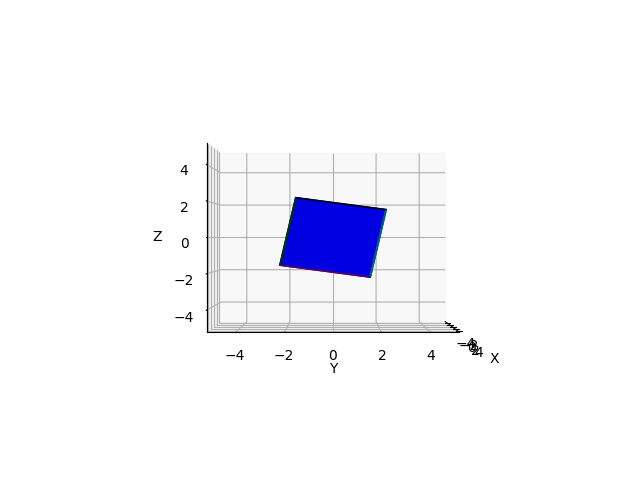

In [52]:
'''
this cell successfully takes in a quaternion (accepts axis-angle and quaternion),
rotates a cube by that amount, then plots the surface

this is making me realize the initial condition will be unit quaternion 1,0,0,0

the next step will be implementing the boresight arrow
'''

#import math
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
from itertools import product, combinations
from numpy import sin, cos

%matplotlib widget 
#^ allows us to interact with the 3D plot -- tells Jupyter to enable interactive backend 

def rot_mat(q):
    """
    This function finds the rotation matrix for a particular quaternion. 
    Our quaternion formulation uses the Hamilton convention, and represents 
    a rotation from the body frame to ECI frame (local-to-inertial rotation). 
    
    So, the rotation matrix will rotate a body vector to ECI, and its transpose
    will rotate from ECI -> body.
    
    This means that if you want to rotate B_ECI to body frame, you MUST transpose the output of this function.
    
    Inputs:
        # q -- 4 x 1 numpy array, quaternion to find rot matrix of
    Returns:
        # A -- 3 x 3 np matrix to rotate a vector between frames (should rotate body -> ECI based on our quaternion model)
    """
    q = q.reshape((4,1))
    q1 = q[0,0]
    q2 = q[1,0]
    q3 = q[2,0]
    q4 = q[3,0]
    A = np.matrix([[q1**2+q2**2-q3**2-q4**2, 2*(q2*q3-q1*q4), 2*(q2*q4+q1*q3)],
                    [2*(q2*q3+q1*q4), q1**2-q2**2+q3**2-q4**2, 2*(q3*q4-q1*q2)],
                    [2*(q2*q4-q1*q3), 2*(q3*q4+q1*q2), q1**2-q2**2-q3**2+q4**2]])

    return A

def rotate_vector(s, q):
    '''
    This function rotates a vector s by a quaternion q

    Inputs:
        # s -- 3 entry numpy array, vector to be rotated
        # q -- 4 entry numpy array, quaternion to find rot matrix of
    Returns:
        # s_rotated -- 3 entry numpy array that contains rotated s
    '''
    s = [s[0], s[1], s[2]] #to get a 2 or 3u cubesat, simply multiply s[2] by 2 or 3
    s_rot_np = rot_mat(q)@(np.array(s).reshape(3,1))
    s_rotated = [s_rot_np[0].item(), s_rot_np[1].item(), s_rot_np[2].item()]
    return s_rotated

def plot_surface(vecs, q, ord, c): 
    '''
    This function accepts a list of vectors vecs

    '''
    vecs_rot = [rotate_vector(vec, q) for vec in vecs]
    x = np.array([[vecs_rot[0][0], vecs_rot[1][0]], [vecs_rot[2][0], vecs_rot[3][0]]])
    y = np.array([[vecs_rot[0][1], vecs_rot[1][1]], [vecs_rot[2][1], vecs_rot[3][1]]])
    z = np.array([[vecs_rot[0][2], vecs_rot[1][2]], [vecs_rot[2][2], vecs_rot[3][2]]])
    ax.plot_surface(x, y, z, color=c, zorder=ord)
    ax.view_init(elev=0, azim=0)  # Adjust the elevation and azimuth angles as desired

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#num = min(num, 97)
ax.clear()
# Setting the axes properties
ax.set_xlim3d([-5.0, 5.0])
ax.set_xlabel('X')

ax.set_ylim3d([-5.0, 5.0])
ax.set_ylabel('Y')

ax.set_zlim3d([-5.0, 5.0])
ax.set_zlabel('Z')

phi = np.deg2rad(80) #45 degrees
rotation_axis = np.array([1,0,0])

q0 = np.cos(phi/2)
qvec = np.sin(phi/2)*rotation_axis
#q = np.array([1,0,0,0]) #unity quaternion
#q = np.array([np.cos(phi/2),np.sin(phi/2)*rotation_axis])
q = np.append(q0, qvec)


s_left = [[-2, -2, -2], [-2, -2, 2], [-2, 2, -2], [-2, 2, 2]]
plot_surface(s_left, q, 2, 'gray')
s_right = [[2, -2, -2], [2, -2, 2], [2, 2, -2], [2, 2, 2]]
plot_surface(s_right, q, 3, 'blue')
s_top = [[-2, -2, 2], [-2, 2, 2], [2, -2, 2], [2, 2, 2]]
plot_surface(s_top, q, 4, 'green')
s_bottom = [[-2, -2, -2], [-2, 2, -2], [2, -2, -2], [2, 2, -2]]
plot_surface(s_bottom, q, 5, 'cyan')
s_front = [[-2, 2, -2], [-2, 2, 2], [2, 2, -2], [2, 2, 2]]
plot_surface(s_front, q, 6, 'black')
s_back = [[-2, -2, -2], [-2, -2, 2], [2, -2, -2], [2, -2, 2]]
plot_surface(s_back, q, 7, 'purple')
#ax.legend()
plt.show()
